In [3]:
import matplotlib.pyplot as plt
import pickle

In [4]:
filename = "alu_2_input_3_bits_factor1_2"
folder_name = "results_ALU"
factor = 1
show_lines = True

with open(folder_name + "/" + filename + '.pickle', "rb") as handle:
    sg_times, events, monitored_neurons = pickle.load(handle)

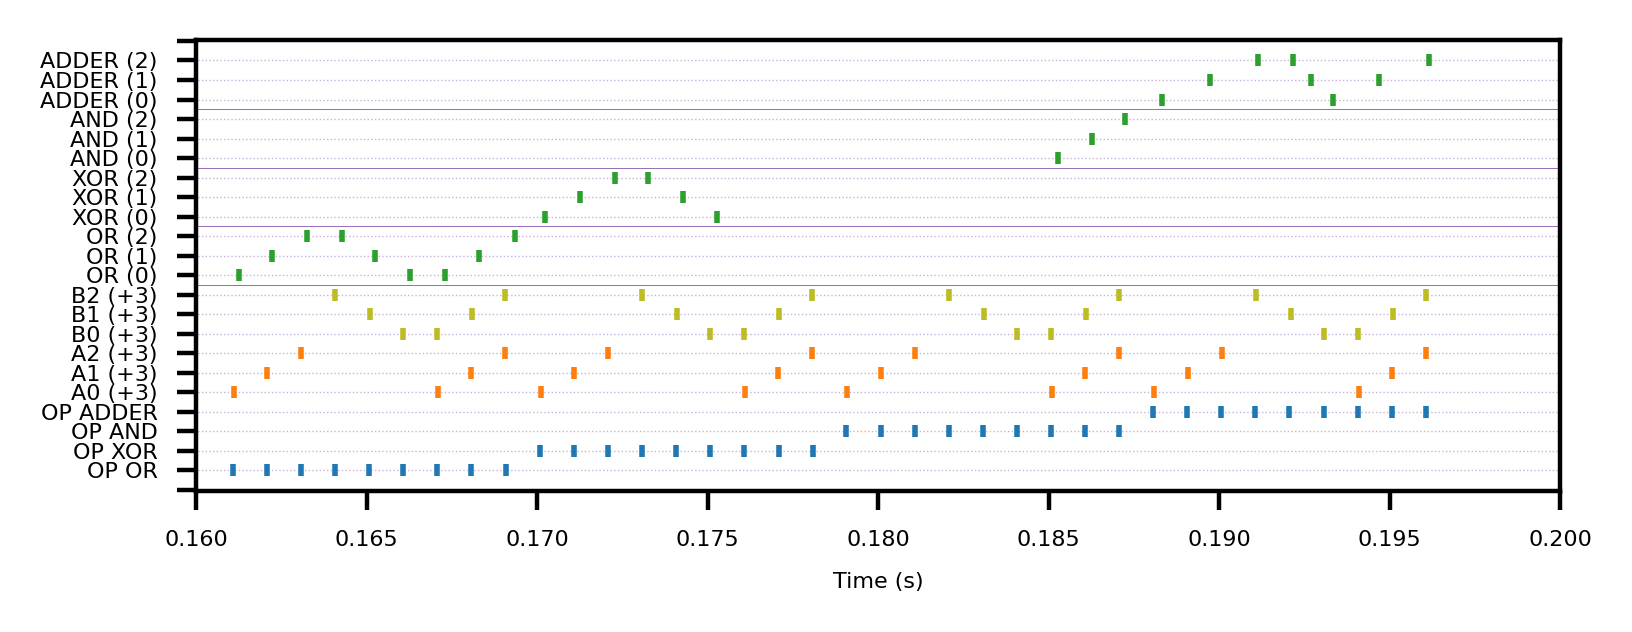

In [9]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['font.size'] = '4'
plt.rcParams["figure.figsize"] = (4, 1.5)

# Lines
if show_lines:
    plt.hlines(range(0, 22), 0, 1, linestyles='dotted', linewidth=0.25, color='indigo', alpha=0.3)
# ------

# alu input delays
for i in range(3):
    for event in events:
        if event[1] == monitored_neurons[i]:
            plt.plot(event[0], i + 4, '|', markersize=2, color='tab:orange')

for i in range(3, 6):
    for event in events:
        if event[1] == monitored_neurons[i]:
            plt.plot(event[0], i + 4, '|', markersize=2, color='tab:olive')
            
# decoder
for i in range(6, 10):
    for event in events:
        if event[1] == monitored_neurons[i]:
            plt.plot(event[0], i - 6, '|', markersize=2, color='tab:blue')

if factor == 1:
    plt.xlim([0.16, 0.20])
elif factor == 0.5:
    plt.xlim([0.17, 0.245])
elif factor == 0.25:
    plt.xlim([0.225, 2.0])
plt.xlabel('Time (s)')
plt.yticks(range(-1, 23), [""] + ["OP OR", "OP XOR", "OP AND", "OP ADDER"] + ["A" + str(i) + " (+3)" for i in range(3)] + ["B" + str(i) + " (+3)" for i in range(3)] + ["OR (" + str(i) + ")" for i in range(3)] + ["XOR (" + str(i) + ")" for i in range(3)] + ["AND (" + str(i) + ")" for i in range(3)] + ["ADDER (" + str(i) + ")" for i in range(3)] + [""])
plt.hlines([9.5, 12.5, 15.5, 18.5], xmin=0, xmax=5, linewidth=0.1, color="indigo")
            
for j in range(3):
    for event in events:
        # or
        if event[1] == monitored_neurons[10 + j]:
            plt.plot(event[0], 10 + j, '|', markersize=2, color='tab:green')

for j in range(3, 6):
    for event in events:
        # xor
        if event[1] == monitored_neurons[13 + 2 * (j - 3)] or event[1] == monitored_neurons[13 + 2 * (j - 3) + 1]:
            plt.plot(event[0], 10 + j, '|', markersize=2, color='tab:green')

for j in range(6, 9):
    for event in events:
        # and
        if event[1] == monitored_neurons[19 + (j - 6)] or event[1] == monitored_neurons[19 + (j - 6)]:
            plt.plot(event[0], 10 + j, '|', markersize=2, color='tab:green')
                
for j in range(3):
    for event in events:
        # adder
        if event[1] == monitored_neurons[-3 + j]:
            plt.plot(event[0], 19 + j, '|', markersize=2, color='tab:green')

plt.tight_layout()
plt.savefig(folder_name + "/" + filename + '.png', transparent=False, facecolor='white', edgecolor='black')